In [12]:
import sqlalchemy
import pandas as pd
import pyodbc

In [13]:
def read_sql_server(sql_query):

    cnct = pyodbc.connect(r"DRIVER={ODBC DRIVER 17 for SQL Server};"
                          r"SERVER=BSLT-25\ROBINHOOD1;"
                          r"DATABASE=linkedin_scraper;"
                          r"Trusted_Connection=yes;", autocommit=True)
    print('connected_to_db')

    df = pd.read_sql(sql_query,cnct)

    print('closing conn')

    cnct.close

    return df

In [14]:
sql_0 = "SELECT TOP(1) job_id, description FROM job_details_l3;"
# df = read_sql_server(sql_0)

In [15]:
df = read_sql_server(sql_0)

connected_to_db
closing conn


In [16]:
df

,job_id,description
0,1714948005,Bridge Partners is an agile and innovative con...


In [17]:
text_desc = df['description'][0]
text_desc

'Bridge Partners is an agile and innovative consulting firm primarily serving large technology enterprises in marketing, sales and operations. Bridge Partners is growing rapidly, expanding nationally and wants to create a working and career development environment where our employees can be their genuine selves and allow their own natural talents and interests to contribute to the firm’s success, as well as their own.\n\nPosition Description \nThe Analytics Consultant will serve the primary function of delivering strategy, products, or services that improve the ability of a client or set of clients to make data-driven decisions for our Analytics practice. This role is focused on listening to requirements from clients or internal audiences and aligning an analytical process to answer a question or describe a behavior leveraging data and tools available. The ideal candidate needs to be very familiar with various analytics tools and databases; have an area of expertise within analytics, a

In [18]:
import nltk

In [19]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [20]:
# tt = word_tokenize(text_desc)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
tokenized_words_text = word_tokenize(text_desc)
# tt

In [22]:
from nltk.probability import FreqDist

In [23]:
fdist = FreqDist(tokenized_words_text)
fdist

FreqDist({'and': 39, ',': 37, 'to': 29, '.': 22, 'of': 12, '·': 12, 'the': 10, 'in': 9, 'with': 9, 'a': 8, ...})

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words("english"))
print (stop_words)

{'t', 've', 'because', 'being', 'only', 'after', 'most', 'it', 'o', 'any', "hasn't", "don't", 'how', 'while', 'was', 'during', 'having', 'more', "doesn't", 'd', 'off', 'is', 'itself', 'needn', 'your', 'below', 'couldn', 'shouldn', 'up', 'just', "couldn't", 'y', 'am', 'does', 'about', 'both', 'didn', 'them', 'he', 'wasn', 'between', 'do', 'and', 'from', 're', 'doesn', "you'd", 'doing', 'herself', 'through', 'are', 'at', "you've", 'did', "won't", 'ain', 'they', 'such', 'where', 'not', "she's", 'all', 'weren', 'ours', 'have', "needn't", 'with', 'into', 'what', "didn't", 'over', 'you', 'my', 'ourselves', 'll', 'but', 'theirs', 'against', 'down', "haven't", 'out', "mightn't", 'to', 'so', 'under', 'be', 'other', "should've", "shan't", 'ma', 'her', 'or', "you're", 'whom', 'yourselves', 'his', 'nor', 'too', 'an', 'if', 'who', 'its', 'now', 'as', 'above', 'hadn', "isn't", 'hasn', 'the', 'when', 'by', "aren't", 'mightn', 'she', "you'll", 'this', 'm', 'yours', 'a', 'again', 'haven', "mustn't", "w

In [26]:

filtered_tokenized_words = []
for word in tokenized_words_text:
    if word not in stop_words:
        filtered_tokenized_words.append(word)
        

In [27]:
# print (filtered_tokenized_words)
print ( len(tokenized_words_text))
print(len(filtered_tokenized_words))

655
475


In [28]:
#stemming
from nltk.stem import PorterStemmer


In [29]:
ps = PorterStemmer()

In [30]:
stemmed_words = []
for w in filtered_tokenized_words:
    stemmed_words.append(ps.stem(w))


print(stemmed_words)

['bridg', 'partner', 'agil', 'innov', 'consult', 'firm', 'primarili', 'serv', 'larg', 'technolog', 'enterpris', 'market', ',', 'sale', 'oper', '.', 'bridg', 'partner', 'grow', 'rapidli', ',', 'expand', 'nation', 'want', 'creat', 'work', 'career', 'develop', 'environ', 'employe', 'genuin', 'selv', 'allow', 'natur', 'talent', 'interest', 'contribut', 'firm', '’', 'success', ',', 'well', '.', 'posit', 'descript', 'the', 'analyt', 'consult', 'serv', 'primari', 'function', 'deliv', 'strategi', ',', 'product', ',', 'servic', 'improv', 'abil', 'client', 'set', 'client', 'make', 'data-driven', 'decis', 'analyt', 'practic', '.', 'thi', 'role', 'focus', 'listen', 'requir', 'client', 'intern', 'audienc', 'align', 'analyt', 'process', 'answer', 'question', 'describ', 'behavior', 'leverag', 'data', 'tool', 'avail', '.', 'the', 'ideal', 'candid', 'need', 'familiar', 'variou', 'analyt', 'tool', 'databas', ';', 'area', 'expertis', 'within', 'analyt', ',', 'ideal', 'abl', 'think', 'creativ', 'across', 

In [31]:
print (len(stemmed_words))

475


In [32]:
def filtered_token_words(words_token):
    filtered_tokenized_words = []
    for word in tokenized_words_text:
        if word not in stop_words:
            filtered_tokenized_words.append(word)
    return filtered_tokenized_words


In [33]:
new_filtered = filtered_token_words(stemmed_words)

In [34]:
print(len(new_filtered))

475


In [35]:
print(new_filtered)
fdist = FreqDist(new_filtered)
fdist

['Bridge', 'Partners', 'agile', 'innovative', 'consulting', 'firm', 'primarily', 'serving', 'large', 'technology', 'enterprises', 'marketing', ',', 'sales', 'operations', '.', 'Bridge', 'Partners', 'growing', 'rapidly', ',', 'expanding', 'nationally', 'wants', 'create', 'working', 'career', 'development', 'environment', 'employees', 'genuine', 'selves', 'allow', 'natural', 'talents', 'interests', 'contribute', 'firm', '’', 'success', ',', 'well', '.', 'Position', 'Description', 'The', 'Analytics', 'Consultant', 'serve', 'primary', 'function', 'delivering', 'strategy', ',', 'products', ',', 'services', 'improve', 'ability', 'client', 'set', 'clients', 'make', 'data-driven', 'decisions', 'Analytics', 'practice', '.', 'This', 'role', 'focused', 'listening', 'requirements', 'clients', 'internal', 'audiences', 'aligning', 'analytical', 'process', 'answer', 'question', 'describe', 'behavior', 'leveraging', 'data', 'tools', 'available', '.', 'The', 'ideal', 'candidate', 'needs', 'familiar', '

FreqDist({',': 37, '.': 22, '·': 12, 'analytics': 7, 'business': 7, 'clients': 6, 'data': 6, 'analytical': 5, '(': 5, ')': 5, ...})

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(data['Phrase'])

In [37]:
text_counts= cv.fit_transform(df['description'])

In [38]:
text_counts

<1x269 sparse matrix of type '<class 'numpy.int64'>'
	with 269 stored elements in Compressed Sparse Row format>

In [39]:
# freq = nltk.FreqDist(clean_tokens)
# for key,val in fdist.items():
#     print(str(key) + ':' + str(val))

In [40]:
fdist.plot(20,cumulative=False)

<Figure size 640x480 with 1 Axes>

In [41]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
lem_words = []
for w in filtered_tokenized_words:
    lem_words.append(lem.lemmatize(w))

In [43]:
print(len(lem_words))

475


In [44]:
freq_2 = nltk.FreqDist(lem_words)
freq_2

FreqDist({',': 37, '.': 22, '·': 12, 'client': 7, 'analytics': 7, 'business': 7, 'data': 6, 'analytical': 5, '(': 5, ')': 5, ...})

In [45]:
import re
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [46]:
punct_tokens = word_tokenize(string.punctuation)
punct_tokens.append('.')
punct_tokens.append('·')
print(punct_tokens)

['!', "''", '#', '$', '%', '&', "'", '(', ')', '*+', ',', '-./', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^_', '`', '{', '|', '}', '~', '.', '·']


In [47]:
# punct_tokens
cleaned_tokens = []
for w in lem_words:
    if w not in punct_tokens:
        cleaned_tokens.append(w.strip())
print(len(cleaned_tokens))

392


In [48]:
freq_3 = nltk.FreqDist(cleaned_tokens)
freq_3

FreqDist({'client': 7, 'analytics': 7, 'business': 7, 'data': 6, 'analytical': 5, 'Bridge': 4, 'Partners': 4, 'process': 4, 'question': 4, 'tool': 4, ...})

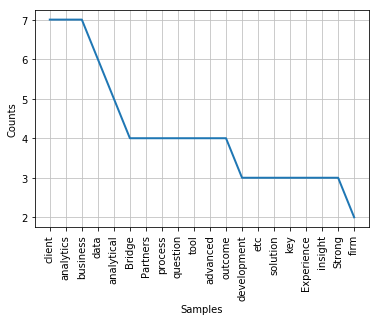

In [49]:
freq_3.plot(20)

In [50]:
import gensim
# import corpora
# import corpora

In [52]:
skill_list = ["Adapting to changing priorities"]
Assessing client/end-user needs
Attention to detail
Business strategies
C/C++
Client relations
Coaching
Coding
Collaboration
Computer science
Consulting
Coping with deadline pressure
Creating reports
Creating and running what-if simulations
Data architecture
Data controls
Data management
Data modeling
Data visualization
Debugging data output irregularities 
Defining data access methods
Delegating
Designing enterprise-level reporting
Designing/modifying data warehouses
Evaluating business intelligence software
Extract, transform, load (ETL) testing
Facilitating the creation of new data-reporting models
Finding trends/patterns
IBM Cognos Analytics
Innovation
Insights
Java
Leading cross-functional teams
Maintaining technical documentation for solutions
Managing relationships with vendors
Managing stress
MatLab
Mentoring
Microsoft Excel
Microsoft Integration Services
Microsoft Office
Microsoft Power BI
Modeling
Monitoring data quality
Motivating staff
Multitasking
Negotiating
Online analytical processing (OLAP)
Organizational approach
Programming
Python
Reporting tools
Researching solutions to user problems
Results oriented
SAS
Statistical analysis
Statistical knowledge
Strategic thinking
Time management
Training end users
Translating high-level design into specific implementation steps
Web analytic tools"""


SyntaxError: invalid syntax (<ipython-input-52-52407c3215d0>, line 2)

In [53]:
# for s in skill_list:
#     print (s)
text = """<ul><li>Adapting to changing priorities</li><li>Assessing client/end-user needs</li><li>Attention to detail</li><li>Business strategies</li><li>C/C++</li><li>Client relations</li><li>Coaching</li><li>Coding</li><li><a href="https://www.thebalancecareers.com/collaboration-skills-with-examples-2059686" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="1">Collaboration</a></li><li>Computer science</li><li>Consulting</li><li>Coping with deadline pressure</li><li>Creating reports</li><li>Creating and running what-if simulations</li><li>Data architecture</li><li>Data controls</li><li>Data management</li><li>Data modeling</li><li>Data visualization</li><li>Debugging data output irregularities&nbsp;</li><li>Defining data access methods</li><li>Delegating</li><li>Designing enterprise-level reporting</li><li>Designing/modifying data warehouses</li><li>Evaluating business intelligence software</li><span class="mntl-sc-block-adslot mntl-sc-block-adslot-inline"></span><li>Extract, transform, load (ETL) testing</li><li>Facilitating the creation of new data-reporting models</li><li>Finding trends/patterns</li><li>IBM Cognos Analytics</li><li>Innovation</li><li>Insights</li><li>Java</li><li>Leading cross-functional teams</li><li>Maintaining technical documentation for solutions</li><li>Managing relationships with vendors</li><li>Managing stress</li><li>MatLab</li><li>Mentoring</li><li>Microsoft Excel</li><li>Microsoft Integration Services</li><li><a href="https://www.thebalancecareers.com/microsoft-office-skills-for-resumes-2062438" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="2">Microsoft Office</a></li><li>Microsoft Power BI</li><li>Modeling</li><li>Monitoring data quality</li><li>Motivating staff</li><li><a href="https://www.thebalancecareers.com/multitasking-skills-with-examples-2059692" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="3">Multitasking</a></li><li><a href="https://www.thebalancecareers.com/negotiation-skills-list-2063760" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="4">Negotiating</a></li><li>Online analytical processing (OLAP)</li><li>Organizational approach</li><span class="mntl-sc-block-adslot mntl-sc-block-adslot-inline"></span><li>Programming</li><li>Python</li><li>Reporting tools</li><li>Researching solutions to user problems</li><li>Results oriented</li><li>SAS</li><li>Statistical analysis</li><li>Statistical knowledge</li><li>Strategic thinking</li><li>Time management</li><li>Training end users</li><li>Translating high-level design into specific implementation steps</li><li>Web analytic tools</li></ul>"""
x2 = text.split("</li>")
print (x2)

['<ul><li>Adapting to changing priorities', '<li>Assessing client/end-user needs', '<li>Attention to detail', '<li>Business strategies', '<li>C/C++', '<li>Client relations', '<li>Coaching', '<li>Coding', '<li><a href="https://www.thebalancecareers.com/collaboration-skills-with-examples-2059686" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="1">Collaboration</a>', '<li>Computer science', '<li>Consulting', '<li>Coping with deadline pressure', '<li>Creating reports', '<li>Creating and running what-if simulations', '<li>Data architecture', '<li>Data controls', '<li>Data management', '<li>Data modeling', '<li>Data visualization', '<li>Debugging data output irregularities&nbsp;', '<li>Defining data access methods', '<li>Delegating', '<li>Designing enterprise-level reporting', '<li>Designing/modifying data warehouses', '<li>Evaluating business intelligence software', '<span class="mntl-sc-block-adslot mntl-sc-block-adslot-inline"></span><li>Extract, tran

In [54]:
import re

text_2=[]
for item in x2:
    before,current,after = item.partition("<li>")
#     text_2.append(re.find("^<li>:(.*)", item))
    if len(after.strip())>0:
        text_2.append(after.strip())
print(text_2)

['Adapting to changing priorities', 'Assessing client/end-user needs', 'Attention to detail', 'Business strategies', 'C/C++', 'Client relations', 'Coaching', 'Coding', '<a href="https://www.thebalancecareers.com/collaboration-skills-with-examples-2059686" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="1">Collaboration</a>', 'Computer science', 'Consulting', 'Coping with deadline pressure', 'Creating reports', 'Creating and running what-if simulations', 'Data architecture', 'Data controls', 'Data management', 'Data modeling', 'Data visualization', 'Debugging data output irregularities&nbsp;', 'Defining data access methods', 'Delegating', 'Designing enterprise-level reporting', 'Designing/modifying data warehouses', 'Evaluating business intelligence software', 'Extract, transform, load (ETL) testing', 'Facilitating the creation of new data-reporting models', 'Finding trends/patterns', 'IBM Cognos Analytics', 'Innovation', 'Insights', 'Java', 'Leadin

In [55]:
text_1 = """<ul><li>Adapting to changing priorities</li><li>Assessing client/end-user needs</li><li>Attention to detail</li><li>Business strategies</li><li>C/C++</li><li>Client relations</li><li>Coaching</li><li>Coding</li><li><a href="https://www.thebalancecareers.com/collaboration-skills-with-examples-2059686" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="1">Collaboration</a></li><li>Computer science</li><li>Consulting</li><li>Coping with deadline pressure</li><li>Creating reports</li><li>Creating and running what-if simulations</li><li>Data architecture</li><li>Data controls</li><li>Data management</li><li>Data modeling</li><li>Data visualization</li><li>Debugging data output irregularities&nbsp;</li><li>Defining data access methods</li><li>Delegating</li><li>Designing enterprise-level reporting</li><li>Designing/modifying data warehouses</li><li>Evaluating business intelligence software</li><span class="mntl-sc-block-adslot mntl-sc-block-adslot-inline"></span><li>Extract, transform, load (ETL) testing</li><li>Facilitating the creation of new data-reporting models</li><li>Finding trends/patterns</li><li>IBM Cognos Analytics</li><li>Innovation</li><li>Insights</li><li>Java</li><li>Leading cross-functional teams</li><li>Maintaining technical documentation for solutions</li><li>Managing relationships with vendors</li><li>Managing stress</li><li>MatLab</li><li>Mentoring</li><li>Microsoft Excel</li><li>Microsoft Integration Services</li><li><a href="https://www.thebalancecareers.com/microsoft-office-skills-for-resumes-2062438" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="2">Microsoft Office</a></li><li>Microsoft Power BI</li><li>Modeling</li><li>Monitoring data quality</li><li>Motivating staff</li><li><a href="https://www.thebalancecareers.com/multitasking-skills-with-examples-2059692" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="3">Multitasking</a></li><li><a href="https://www.thebalancecareers.com/negotiation-skills-list-2063760" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="4">Negotiating</a></li><li>Online analytical processing (OLAP)</li><li>Organizational approach</li><span class="mntl-sc-block-adslot mntl-sc-block-adslot-inline"></span><li>Programming</li><li>Python</li><li>Reporting tools</li><li>Researching solutions to user problems</li><li>Results oriented</li><li>SAS</li><li>Statistical analysis</li><li>Statistical knowledge</li><li>Strategic thinking</li><li>Time management</li><li>Training end users</li><li>Translating high-level design into specific implementation steps</li><li>Web analytic tools</li></ul>"""
text_2 = """<ul><li>Identifying and prioritizing problem areas</li><li>Determining factors that contribute to problems</li><li>Weighing alternative solutions</li><li>Assessing stakeholder perceptions regarding problems</li><li>Estimating costs for interventions</li><li>Proposing solutions</li><li>Persuading others to adopt solutions</li><li>Creativity</li><li>Decision making</li><li>Research</li><li>Project management</li><li>Leading brainstorming sessions</li></ul>"""
text_3 = """<ul><li>Industry trend analysis</li><li>Interpreting professional literature</li><li>Identifying best practices</li><li>Developing relationships with industry experts and influencers</li><li>Understanding the impact of economic cycles on your industry sector</li><li>Participating in industry-focused professional meetings and conferences</li></ul>"""
text_4 = """<ul><li>PowerPoint</li><li>Group presentations</li><li>Interviewing stakeholders to secure information</li><li>Presenting graphical data</li><li>Drawing consensus on research priorities</li><li>Facilitating group discussion</li><li>Writing summaries</li><li>Technical writing</li><li>Pitching proposals</li><li>Teamwork</li><li>Listening</li><li>Conveying complex information in understandable terms</li><li>Leadership</li></ul>"""
text_5 = """<ul><li>Database management</li><li>Survey design</li><li>Formulating data queries</li><li>SAS</li><li>SPS</li><li>Coding data</li><li>Drawing inferences</li><li>Applying scientific methods to gathering data</li><li><a href="https://www.thebalancecareers.com/critical-thinking-definition-with-examples-2063745" data-component="link" data-source="inlineLink" data-type="internalLink" data-ordinal="1">Critical thinking</a></li><li>Quantitative analysis</li><li>SQL programming</li><li>Identifying high-value areas for inquiry</li><li>Establishing benchmarks</li><li>Identifying and measuring correlations</li><li>Intellectual curiosity</li><li>Classifying data</li><li>Strategic planning</li></ul>"""
text_6 = text_1 + text_2 + text_3 + text_4 + text_5
x3 = text_6.split("</li>")

In [56]:
text_final=[]
for item in x3:
    before,current,after = item.partition("<li>")
#     text_2.append(re.find("^<li>:(.*)", item))
    if len(after.strip())>0 and "<a" not in after.strip():
        text_final.append(after.strip())
print(text_final)

['Adapting to changing priorities', 'Assessing client/end-user needs', 'Attention to detail', 'Business strategies', 'C/C++', 'Client relations', 'Coaching', 'Coding', 'Computer science', 'Consulting', 'Coping with deadline pressure', 'Creating reports', 'Creating and running what-if simulations', 'Data architecture', 'Data controls', 'Data management', 'Data modeling', 'Data visualization', 'Debugging data output irregularities&nbsp;', 'Defining data access methods', 'Delegating', 'Designing enterprise-level reporting', 'Designing/modifying data warehouses', 'Evaluating business intelligence software', 'Extract, transform, load (ETL) testing', 'Facilitating the creation of new data-reporting models', 'Finding trends/patterns', 'IBM Cognos Analytics', 'Innovation', 'Insights', 'Java', 'Leading cross-functional teams', 'Maintaining technical documentation for solutions', 'Managing relationships with vendors', 'Managing stress', 'MatLab', 'Mentoring', 'Microsoft Excel', 'Microsoft Integr

In [57]:
len(text_final)

105

In [58]:
skill_list_2 = """<tbody><tr>
  <th>Keywords</th>
  <th>Popularity</th>

</tr>

<tr><td>SQL</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:16"><div class="w3-container">16<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Tableau</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:9"><div class="w3-container">9<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>ETL</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:6"><div class="w3-container">6<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>power bi</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:6"><div class="w3-container">6<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>SSIS</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:5"><div class="w3-container">5<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Business Intelligence</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:4"><div class="w3-container">4<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Cloud</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:3"><div class="w3-container">3<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Looker</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:3"><div class="w3-container">3<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Data warehousing</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:3"><div class="w3-container">3<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Alteryx</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:3"><div class="w3-container">3<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>DATA</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:3"><div class="w3-container">3<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Python</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:3"><div class="w3-container">3<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Analytics</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Google Analytics</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>T-SQL</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Analyst</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>data analysis</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>AWS</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>reporting</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Insight</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>MI Reports</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Agile</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>SSRS</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>powerbi</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Microsoft Excel</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Intelligence</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:2"><div class="w3-container">2<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>AI</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Machine Learning</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Data Engineer</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Google Cloud</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Kubernetes</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Analysis</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>database</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>CRM</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Excel</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>BI Analyst</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Financial Services</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>BI Developer</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Commercial</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Customer</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Data Visualization</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Segmentation</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Modelling</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>ssas</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Graduate</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Marketing</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Web Analytics</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Analytical Skills</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Business Analytics</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Finance</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Local Government</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>data analyst</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Variance Analysis</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Tableu</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Design</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Analytical</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Troubleshooting</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Business Intelligence Developer</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>application</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Engineer</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Programming Languages</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>redshift</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Engineering</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>support</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Estimation</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Business Analysis</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Communication Skills</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Business Analyst</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr><tr><td>Cyber Security</td>
  <td style="vertical-align : middle;text-align:center;padding-right:20px"><div class="w3-light-grey">
  <div style="background-color:2196F3;height:20px;width:1"><div class="w3-container">1<span class="w3-small">%</span></div></div>
</div></td></tr></tbody>"""

In [59]:
x4 = skill_list_2.split("</td>")
# x4

In [60]:
# for item in x4:
    

In [61]:
skill_list_final_2=[]
for item in x4:
    before,current,after = item.partition("<td>")
#     text_2.append(re.find("^<li>:(.*)", item))
    if len(after.strip())>0 and "<a" not in after.strip():
        skill_list_final_2.append(after.strip())
print(skill_list_final_2)

['SQL', 'Tableau', 'ETL', 'power bi', 'SSIS', 'Business Intelligence', 'Cloud', 'Looker', 'Data warehousing', 'Alteryx', 'DATA', 'Python', 'Analytics', 'Google Analytics', 'T-SQL', 'Analyst', 'data analysis', 'AWS', 'reporting', 'Insight', 'MI Reports', 'Agile', 'SSRS', 'powerbi', 'Microsoft Excel', 'Intelligence', 'AI', 'Machine Learning', 'Data Engineer', 'Google Cloud', 'Kubernetes', 'Analysis', 'database', 'CRM', 'Excel', 'BI Analyst', 'Financial Services', 'BI Developer', 'Commercial', 'Customer', 'Data Visualization', 'Segmentation', 'Modelling', 'ssas', 'Graduate', 'Marketing', 'Web Analytics', 'Analytical Skills', 'Business Analytics', 'Finance', 'Local Government', 'data analyst', 'Variance Analysis', 'Tableu', 'Design', 'Analytical', 'Troubleshooting', 'Business Intelligence Developer', 'application', 'Engineer', 'Programming Languages', 'redshift', 'Engineering', 'support', 'Estimation', 'Business Analysis', 'Communication Skills', 'Business Analyst', 'Cyber Security']


In [62]:
final_skill_list = skill_list_final_2 + text_final
print(len(final_skill_list))


174


In [63]:
import spacy
from spacy.matcher import PhraseMatcher
import en_core_web_sm
nlp = en_core_web_sm.load()

In [64]:
# matcher.add('skill_keywords',None, *final_skill_list)

In [65]:
# words_list = []
# for word in final_skill_list:
#     words_list.append(nlp(word))
    
words_list = [nlp(word) for word in final_skill_list]
print(words_list)

[SQL, Tableau, ETL, power bi, SSIS, Business Intelligence, Cloud, Looker, Data warehousing, Alteryx, DATA, Python, Analytics, Google Analytics, T-SQL, Analyst, data analysis, AWS, reporting, Insight, MI Reports, Agile, SSRS, powerbi, Microsoft Excel, Intelligence, AI, Machine Learning, Data Engineer, Google Cloud, Kubernetes, Analysis, database, CRM, Excel, BI Analyst, Financial Services, BI Developer, Commercial, Customer, Data Visualization, Segmentation, Modelling, ssas, Graduate, Marketing, Web Analytics, Analytical Skills, Business Analytics, Finance, Local Government, data analyst, Variance Analysis, Tableu, Design, Analytical, Troubleshooting, Business Intelligence Developer, application, Engineer, Programming Languages, redshift, Engineering, support, Estimation, Business Analysis, Communication Skills, Business Analyst, Cyber Security, Adapting to changing priorities, Assessing client/end-user needs, Attention to detail, Business strategies, C/C++, Client relations, Coaching, 

In [66]:
# matcher = PhraseMatcher(nlp.vocab, max_length=20)
# matcher.add('skill_keywords',None, *words_list)

In [67]:
color_patterns = [nlp(text) for text in ('red', 'green', 'yellow')]

In [68]:
def words_counter(sentence):
    str_1 = sentence.strip()
    count=0
    for char in sentence:
        if char==" ":
            count+=1
        else:
            continue
    return (count+1)

In [69]:
no_words = []
final_skill_list_v2 = []
for sentence in final_skill_list:
    len_sen = words_counter(sentence)
    
    if len_sen<10:
        final_skill_list_v2.append(sentence.lower())
        no_words.append(len_sen)
print(no_words)
# print(final_skill_list_v2)

[1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 4, 3, 3, 2, 1, 2, 1, 1, 2, 1, 4, 2, 5, 2, 2, 2, 2, 2, 4, 4, 1, 3, 3, 4, 5, 7, 2, 3, 1, 1, 1, 3, 5, 4, 2, 1, 1, 2, 3, 3, 1, 3, 2, 4, 2, 1, 1, 2, 5, 2, 1, 2, 2, 2, 2, 3, 7, 3, 5, 6, 3, 5, 4, 2, 5, 1, 2, 1, 2, 3, 3, 3, 3, 7, 7, 1, 2, 5, 3, 5, 3, 2, 2, 2, 1, 1, 6, 1, 2, 2, 3, 1, 1, 2, 2, 6, 2, 2, 5, 2, 4, 2, 2, 2]


In [70]:
# matcher.add('skill_keywords',None, *words_list)
words_list_v2 = [nlp(word) for word in final_skill_list_v2]
# words_list_v2

In [71]:
matcher.add('skill_keywords',None, *words_list_v2)

NameError: name 'matcher' is not defined

In [72]:
text = text_desc.replace("\n", "").lower()
doc = nlp(text)

In [73]:
matches = matcher(doc)

NameError: name 'matcher' is not defined

In [74]:
print(matches)

NameError: name 'matches' is not defined

In [75]:
d=[]
for match_id, start, end in matches:
#     print(match_id)
    rule_id = nlp.vocab.strings[match_id]
    span = doc[start : end] 
    d.append((rule_id,span.text))
# print(span)
        
print(d)
        
print(rule_id)

NameError: name 'matches' is not defined

In [225]:
# keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in counter(d).items())

NameError: name 'counter' is not defined

In [76]:
# textimport PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [77]:
keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())

In [78]:
df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))

In [79]:
df3

,Subject,Keyword,Count


In [80]:
import matplotlib.pyplot as plt
# plt.show()

In [81]:
text

'bridge partners is an agile and innovative consulting firm primarily serving large technology enterprises in marketing, sales and operations. bridge partners is growing rapidly, expanding nationally and wants to create a working and career development environment where our employees can be their genuine selves and allow their own natural talents and interests to contribute to the firm’s success, as well as their own.position description the analytics consultant will serve the primary function of delivering strategy, products, or services that improve the ability of a client or set of clients to make data-driven decisions for our analytics practice. this role is focused on listening to requirements from clients or internal audiences and aligning an analytical process to answer a question or describe a behavior leveraging data and tools available. the ideal candidate needs to be very familiar with various analytics tools and databases; have an area of expertise within analytics, and ide

In [82]:
keyword_dict = pd.read_csv('C:/Users/kkari/Desktop/dev/LinkedIn_extractor/Anaconda/skills.csv')

In [83]:
print(keyword_dict.head())

             Statistics     Machine Learning       Programming  \
0    statistical models    linear regression  machine learning   
1  statistical modeling  logistic regression     deep learning   
2           probability              K means                 r   
3   normal distribution        random forest            ggplot   
4  poisson distribution              xgboost            python   

  BI and Reporting         database            general  sponsorship  
0            excel            azure  business analysis  sponsorship  
1          powerbi              aws            finance          NaN  
2         power bi              ec2      data analysis          NaN  
3  reporting tools  amazon redshift           customer          NaN  
4            kpi's           docker          behaviour          NaN  


In [84]:
stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
programming_words = [nlp(text) for text in keyword_dict['Programming'].dropna(axis = 0)]
other_bi_words = [nlp(text) for text in keyword_dict['Tableau and others'].dropna(axis = 0)]
powerbi_words = [nlp(text) for text in keyword_dict['Power BI'].dropna(axis = 0)]
database_words = [nlp(text) for text in keyword_dict['database'].dropna(axis = 0)]
general_words = [nlp(text) for text in keyword_dict['general'].dropna(axis = 0)]

KeyError: 'Tableau and others'

In [85]:
matcher = PhraseMatcher(nlp.vocab)

In [86]:
matcher.add('Stats', None, *stats_words)
matcher.add('ML', None, *ML_words)
matcher.add('Programming', None, *programming_words)
matcher.add('other_bi', None, *other_bi_words)
matcher.add('powerbi', None, *powerbi_words)
matcher.add('database', None, *database_words)
matcher.add('general', None, *general_words)

NameError: name 'other_bi_words' is not defined

In [87]:
doc = nlp(text)

In [88]:
 d = []  
matches = matcher(doc)
for match_id, start, end in matches:
    rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
    span = doc[start : end]  # get the matched slice of the doc
    d.append((rule_id, span.text))   
d

[('ML', 'regression'),
 ('Programming', 'machine learning'),
 ('Stats', 'quantitative'),
 ('Programming', 'programming'),
 ('Programming', 'sas'),
 ('Programming', 'spss'),
 ('Programming', 'r'),
 ('Programming', 'python')]

In [89]:
keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())

In [90]:
keywords

'ML regression (1)\nProgramming machine learning (1)\nStats quantitative (1)\nProgramming programming (1)\nProgramming sas (1)\nProgramming spss (1)\nProgramming r (1)\nProgramming python (1)'

In [91]:
df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))

In [92]:
# base = os.path.basename(file)
df_query = read_sql_server(sql_0)
df_query

connected_to_db
closing conn


,job_id,description
0,1714948005,Bridge Partners is an agile and innovative con...


In [93]:
job_id = df_query['job_id'][0]
job_id

'1714948005'

In [94]:
dataf = pd.concat([df_query['job_id'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
df3

,Subject,Keyword,Count
0,ML,regression,1
1,Programming,machine learning,1
2,Stats,quantitative,1
3,Programming,programming,1
4,Programming,sas,1
5,Programming,spss,1
6,Programming,r,1
7,Programming,python,1


In [95]:

df3['Count'] = df3['Count'].apply(lambda x: int(x.rstrip(")")))

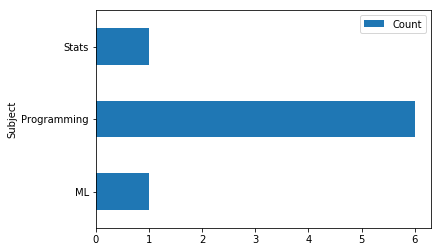

In [96]:
df3.groupby(['Subject']).sum().plot(kind = "barh")

In [97]:
text = """Krish Kari
8450 Cambridge St, Houston, TX - 77054 | 7134976768 | krishkari50@gmail.com | Website
Summary
•	Expertise in leveraging metrics, statistical analysis and visualization tools to dive deep into complex issues while deriving actionable results from operational and enterprise data.
•	Experience in extracting raw data from structured and unstructured data sources, transforming it using Python, SQL, regular expressions, and loading into an enterprise data warehouse (Extract-Transform-Load). 
•	Wide array of experiences in interpreting and analyzing data using statistical techniques and systems. 
•	Hands-on experience in data design and analysis using PowerBI, solving complex business problems. 
•	Strong understanding of CRM databases/systems, to query and analyze customer data. 
•	Experience with PowerBI, Tableau, MS Excel, MS Access and SQL Server Reporting Services (SSRS). 
•	Extensive experience in in-depth data analysis on different databases and structures. 
•	Strong knowledge in writing advanced SQL queries, sub-queries, and joins. 
•	Experience in designing stunning visualizations using PowerBI, Tableau, MicroStrategy, Spotfire, D3.js and publishing and presenting dashboards on web and desktop platforms. 
Education
MASTERS IN INDUSTRIAL ENGINEERING | MAY 2017 | UNIVERSITY OF HOUSTON | GPA- 3.3
•	Relevant Course work: Probability & Statistics, Statistical Process Control, Enterprise Operations and Business Intelligence, Management in Information Systems, Advanced Linear Optimization.
BACHELOR OF TECHNOLOGY IN MECHANICAL ENGINEERING | MAY 2015 | JNTUK | GPA- 3.5
Skills & Abilities
Reporting Tools	PowerBI, Tableau, MicroStrategy, Spotfire, SSRS
BI Tools	PowerBI, Micro Strategy, Tableau, SAP-PA, Spotfire, Qlik
Business Modeling	Microsoft Visio
Data modeling	Microsoft SQL Server Analysis Services
Programming Languages	Python, R
Databases	MYSQL, SQL Server, Oracle SQL, PostgreSQL
Applications/IDE	PyCharm, Eclipse, Minitab, MSOffice Suite, MS Visio,
Document management	Visual Source Safe 6.0, Share point, Ultra Edit
Operating Systems	Windows, UNIX, Linux

Experience
SENIOR BUSINESS INTELLIGENCE ANALYST | BLUESPRIG PEDIATRICS | JUL 2019 – PRESENT
•	Owns all dashboards for the business, and work with all stakeholders and partners to ensure all the dashboards are accurate.
•	Responsible for all the technical implementations and documentations associated with the Operations dashboards and strive for 100% accuracy.
•	Provided insight on the strategy and operating performance of the businesses for executive reviews and strategy summits.
•	Perform ad hoc analyses to identify opportunities and pain points for the business and find creative solutions.
•	Work cross-functionally with other departments to provide visibility and insight into how their KPIs affect the company operations.
•	Design new metrics and enhance existing metrics to support the future state of business processes and ensure sustainability.
•	Collaborate cross-functionally with Business Function owners to drive strategic initiatives forward.
•	Conduct sophisticated analysis and modeling using PowerBI that translates data into actionable insights and supports business development.
•	Partnered with internal stakeholders on several projects to identify and articulate opportunities, see beyond the data to identify solutions that raised the bar for decision making. 
•	Recommended and driven process changes based on robust analysis of operational data and user behavior to improve overall business performance. 
PYTHON DEVELOPER | AT&T | FEB 2018 – APRIL 2018
•	Evaluated data for distribution, classification and correlation. 
•	Developed a Python tool that automates the manual conversion of specification file to Cloudify Blueprint.
•	Designed and developed interactive dashboards from real-time data using Tableau.
•	Performed Statistical Data validation using Python to ensure accuracy of findings. 
•	Conducted sales and business analysis using multiple tools: Excel, Python and Tableau.
•	Developed reports with complex formulas/equations using Excel, Access and Tableau.
•	Clearly and effectively presented information to internal stakeholders. 
•	Worked with Reporting team and created the required data visualization dash boards on Tableau with all the required filters. 
•	Working closely with internal clients in accumulating the metric definitions, data visualization requirements to design a dynamic process.
WORKFORCE ANALYST | SODEXO | JUN 2017 – JAN 2018
•	The project consisted of three stages:
•	1) Initial workforce analysis and providing recommendations to improve productivity,
•	2) Conducting data analytics on labor metrics, and identifying critical issues like excessive overtime, absenteeism, ineffective scheduling, and improving efficient temp labor utilization, 
•	3) Developing an on-demand Business Intelligence dashboard for visibility into cost and performance metrics, monitoring KPIs in MicroStrategy and Tableau.

Responsibilities: 
•	Analyzed workforce data for 10,000 cost-centers and developed predictive linear regression model in Python with Scikit-learn to estimate labor utilization and expected annual labor costs per cost-center.
•	Developed Extract-Transform-Load program in Python to extract employee data from different data sources (MS SQL Server, Kronos, MS Access), completed denormalization and aggregation of data for subsequent statistical analysis.
•	Developed BI dashboard in MicroStrategy for real-time KPI monitoring: Overtime hours, scheduling effectiveness, clock punch %, absenteeism and accidental overtime.
•	Applied linear regression in Python to understand the relationship between different attributes of dataset and causal relationship between them, applied Ridge, Lasso regressions with L1 regularization and identified statistically significant factors influencing overtime. 
•	Designed custom reports, charts, tables and data visualization dashboards using Tableau for business development teams to support decision-making process. 
•	Involved in translating the business requirements into Data requirements mainly focusing on reducing temp labor costs by detail analysis on labor scheduling.
•	Created customized AD-HOC reports and processes for analysis purpose.

PROJECTS | UNIVERSITY OF HOUSTON | JAN 2016 – MAY 2017
ADVANCED LINEAR OPTIMIZATION
        Developed a model to maximize revenue for 36 product varieties that are manufactured at three different locations. Laid out a production and transportation plan that minimizes production costs and transportation costs using advanced Linear Optimization techniques (Microsoft Excel and Python)
`
ILLIUM INC. TRANSACTIONAL DATA ANALYSIS
•	Conducted Investigative analysis on the mass transaction data of Ilium Inc. used TIBCO-Spotfire & Python to identify root-causes for key problems.
•	Performed regression analysis to find the correlation between several KPI’s (factory efficiencies, lot sizes, etc.) and product costs.
•	Designed an interactive dashboard in Spotfire, that tracks products with most delivery issues, and calculate overall CSI (customer satisfaction Index) for selected region of focus.
 
STATISTICAL PROCESS CONTROL
•	Historical output power data of solar cells is analyzed to improve the process capability of the Manufacturing Plant.
•	Data Collection – Responsible for establishing the correct data exchange system by manual tables (Microsoft Excel, Access, Minitab). 
•	Responsible to review analysis in the forms of, but not limited to, Histograms, Pareto Charts, Time Series Trend Line, Statistical Process Control Charts, ANOVA, Six Sigma Score and Rates and Means.
•	Created Access database and built a dashboard in Tableau, as a temporary solution, to continuously monitor the control charts and the quality scores when new data is appended to database tables.
•	Improved process capability by 35% for a solar cell manufacturing plant by identifying and recommending corrective actions for the possible reasons for out of control outputs from the solar module.

SAP-ERP SIMULATION
•	Hands on experience on SAP predictive Analytics; created regression models and conducted Hypothesis testing on forecasting the sales and production requirements for a Cereal company with 12 product varieties.
•	Co-ordinated with cross-functional team to plan, execute and strategically implement the decisions by observing key performance indicators from historical analysis.
•	Team was awarded 1st place for methodology and 2nd based on final revenue score.

JUNIOR DATA ANALYST | VIKAS TECHNOLOGIES | JAN 2015 – DEC 2015
•	Responsible for various daily reporting assignments summarizing sales activity for several business 
units. 
•	Responsible for data aggregation, data pre-processing, missing value imputation and descriptive and inferential analysis. 
•	Used SQL, Minitab, MS Access and Excel for creating summaries, running summary statistics and result tables.
•	Created and presented impactful Tableau Dashboards and Excel visualizations to team members and clients to improve system efficiencies and reduce total expenses.
•	Participated in team projects and brainstorming sessions to assess various methodologies for study designs.
•	Communicated with technical and non-technical end users, providing clear explanation of procedures used and results obtained from data analysis tasks.




"""

In [98]:
text = text.lower().replace("  "," ")

In [99]:
text = text.replace("\n"," ")
text

'krish kari 8450 cambridge st, houston, tx - 77054 | 7134976768 | krishkari50@gmail.com | website summary •\texpertise in leveraging metrics, statistical analysis and visualization tools to dive deep into complex issues while deriving actionable results from operational and enterprise data. •\texperience in extracting raw data from structured and unstructured data sources, transforming it using python, sql, regular expressions, and loading into an enterprise data warehouse (extract-transform-load).  •\twide array of experiences in interpreting and analyzing data using statistical techniques and systems.  •\thands-on experience in data design and analysis using powerbi, solving complex business problems.  •\tstrong understanding of crm databases/systems, to query and analyze customer data.  •\texperience with powerbi, tableau, ms excel, ms access and sql server reporting services (ssrs).  •\textensive experience in in-depth data analysis on different databases and structures.  •\tstrong

             Statistics     Machine Learning       Programming  \
0    statistical models    linear regression  machine learning   
1  statistical modeling  logistic regression     deep learning   
2           probability              K means                 r   
3   normal distribution        random forest            ggplot   
4  poisson distribution              xgboost            python   

  BI and Reporting         database            general  sponsorship  
0            excel            azure  business analysis  sponsorship  
1          powerbi              aws            finance          NaN  
2         power bi              ec2      data analysis          NaN  
3  reporting tools  amazon redshift           customer          NaN  
4            kpi's           docker          behaviour          NaN  


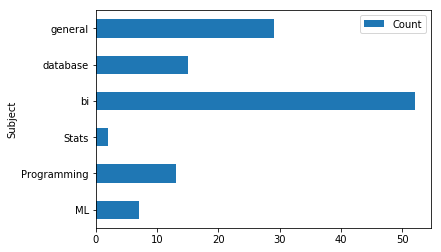

In [100]:

keyword_dict = pd.read_csv('C:/Users/kkari/Desktop/dev/LinkedIn_extractor/Anaconda/skills.csv')
print(keyword_dict.head())

stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
programming_words = [nlp(text) for text in keyword_dict['Programming'].dropna(axis = 0)]
bi_words = [nlp(text) for text in keyword_dict['BI and Reporting'].dropna(axis = 0)]
sponsorship_words = [nlp(text) for text in keyword_dict['sponsorship'].dropna(axis = 0)]
database_words = [nlp(text) for text in keyword_dict['database'].dropna(axis = 0)]
general_words = [nlp(text) for text in keyword_dict['general'].dropna(axis = 0)]


matcher = PhraseMatcher(nlp.vocab)

matcher.add('Stats', None, *stats_words)
matcher.add('ML', None, *ML_words)
matcher.add('Programming', None, *programming_words)
matcher.add('bi', None, *bi_words)
matcher.add('sponsorship', None, *sponsorship_words)
matcher.add('database', None, *database_words)
matcher.add('general', None, *general_words)

doc = nlp(text)

d = []  
matches = matcher(doc)
for match_id, start, end in matches:
    rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
    span = doc[start : end]  # get the matched slice of the doc
    d.append((rule_id, span.text))   
d

keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())

df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
df3['Count'] = df3['Count'].apply(lambda x: int(x.rstrip(")")))

df3.groupby(['Subject']).sum().plot(kind = "barh")

In [101]:
df3.head()

,Subject,Keyword,Count
0,bi,metrics,5
1,general,analysis,18
2,Programming,python,11
3,database,sql,8
4,bi,powerbi,6


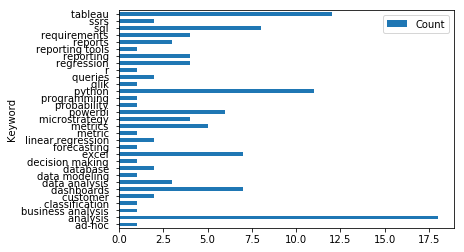

In [102]:
df3.groupby(['Keyword']).sum().plot(kind = "barh")

In [103]:
text_1 = """'krish kari 8450 cambridge st, houston, tx - 77054 | 7134976768 | krishkari50@gmail.com | website summary •\texpertise in leveraging metrics, statistical analysis and visualization tools to dive deep into complex issues while deriving actionable results from operational and enterprise data. •\texperience in extracting raw data from structured and unstructured data sources, transforming it using python, sql, regular expressions, and loading into an enterprise data warehouse (extract-transform-load).  •\twide array of experiences in interpreting and analyzing data using statistical techniques and systems.  •\thands-on experience in data design and analysis using powerbi, solving complex business problems.  •\tstrong understanding of crm databases/systems, to query and analyze customer data.  •\texperience with powerbi, tableau, ms excel, ms access and sql server reporting services (ssrs).  •\textensive experience in in-depth data analysis on different databases and structures.  •\tstrong knowledge in writing advanced sql queries, sub-queries, and joins.  •\texperience in designing stunning visualizations using powerbi, tableau, microstrategy, spotfire, d3.js and publishing and presenting dashboards on web and desktop platforms.  education masters in industrial engineering | may 2017 | university of houston | gpa- 3.3 •\trelevant course work: probability & statistics, statistical process control, enterprise operations and business intelligence, management in information systems, advanced linear optimization. bachelor of technology in mechanical engineering | may 2015 | jntuk | gpa- 3.5 skills & abilities reporting tools\tpowerbi, tableau, microstrategy, spotfire, ssrs bi tools\tpowerbi, micro strategy, tableau, sap-pa, spotfire, qlik business modeling\tmicrosoft visio data modeling\tmicrosoft sql server analysis services programming languages\tpython, r databases\tmysql, sql server, oracle sql, postgresql applications/ide\tpycharm, eclipse, minitab, msoffice suite, ms visio, document management\tvisual source safe 6.0, share point, ultra edit operating systems\twindows, unix, linux  experience senior business intelligence analyst | bluesprig pediatrics | jul 2019 – present •\towns all dashboards for the business, and work with all stakeholders and partners to ensure all the dashboards are accurate. •\tresponsible for all the technical implementations and documentations associated with the operations dashboards and strive for 100% accuracy. •\tprovided insight on the strategy and operating performance of the businesses for executive reviews and strategy summits. •\tperform ad hoc analyses to identify opportunities and pain points for the business and find creative solutions. •\twork cross-functionally with other departments to provide visibility and insight into how their kpis affect the company operations. •\tdesign new metrics and enhance existing metrics to support the future state of business processes and ensure sustainability. •\tcollaborate cross-functionally with business function owners to drive strategic initiatives forward. •\tconduct sophisticated analysis and modeling using powerbi that translates data into actionable insights and supports business development. •\tpartnered with internal stakeholders on several projects to identify and articulate opportunities, see beyond the data to identify solutions that raised the bar for decision making.  •\trecommended and driven process changes based on robust analysis of operational data and user behavior to improve overall business performance.  python developer | at&t | feb 2018 – april 2018 •\tevaluated data for distribution, classification and correlation.  •\tdeveloped a python tool that automates the manual conversion of specification file to cloudify blueprint. •\tdesigned and developed interactive dashboards from real-time data using tableau. •\tperformed statistical data validation using python to ensure accuracy of findings.  •\tconducted sales and business analysis using multiple tools: excel, python and tableau. •\tdeveloped reports with complex formulas/equations using excel, access and tableau. •\tclearly and effectively presented information to internal stakeholders.  •\tworked with reporting team and created the required data visualization dash boards on tableau with all the required filters.  •\tworking closely with internal clients in accumulating the metric definitions, data visualization requirements to design a dynamic process. workforce analyst | sodexo | jun 2017 – jan 2018 •\tthe project consisted of three stages: •\t1) initial workforce analysis and providing recommendations to improve productivity, •\t2) conducting data analytics on labor metrics, and identifying critical issues like excessive overtime, absenteeism, ineffective scheduling, and improving efficient temp labor utilization,  •\t3) developing an on-demand business intelligence dashboard for visibility into cost and performance metrics, monitoring kpis in microstrategy and tableau.  responsibilities:  •\tanalyzed workforce data for 10,000 cost-centers and developed predictive linear regression model in python with scikit-learn to estimate labor utilization and expected annual labor costs per cost-center. •\tdeveloped extract-transform-load program in python to extract employee data from different data sources (ms sql server, kronos, ms access), completed denormalization and aggregation of data for subsequent statistical analysis. •\tdeveloped bi dashboard in microstrategy for real-time kpi monitoring: overtime hours, scheduling effectiveness, clock punch %, absenteeism and accidental overtime. •\tapplied linear regression in python to understand the relationship between different attributes of dataset and causal relationship between them, applied ridge, lasso regressions with l1 regularization and identified statistically significant factors influencing overtime.  •\tdesigned custom reports, charts, tables and data visualization dashboards using tableau for business development teams to support decision-making process.  •\tinvolved in translating the business requirements into data requirements mainly focusing on reducing temp labor costs by detail analysis on labor scheduling. •\tcreated customized ad-hoc reports and processes for analysis purpose.  projects | university of houston | jan 2016 – may 2017 advanced linear optimization     developed a model to maximize revenue for 36 product varieties that are manufactured at three different locations. laid out a production and transportation plan that minimizes production costs and transportation costs using advanced linear optimization techniques (microsoft excel and python) ` illium inc. transactional data analysis •\tconducted investigative analysis on the mass transaction data of ilium inc. used tibco-spotfire & python to identify root-causes for key problems. •\tperformed regression analysis to find the correlation between several kpi’s (factory efficiencies, lot sizes, etc.) and product costs. •\tdesigned an interactive dashboard in spotfire, that tracks products with most delivery issues, and calculate overall csi (customer satisfaction index) for selected region of focus.   statistical process control •\thistorical output power data of solar cells is analyzed to improve the process capability of the manufacturing plant. •\tdata collection – responsible for establishing the correct data exchange system by manual tables (microsoft excel, access, minitab).  •\tresponsible to review analysis in the forms of, but not limited to, histograms, pareto charts, time series trend line, statistical process control charts, anova, six sigma score and rates and means. •\tcreated access database and built a dashboard in tableau, as a temporary solution, to continuously monitor the control charts and the quality scores when new data is appended to database tables. •\timproved process capability by 35% for a solar cell manufacturing plant by identifying and recommending corrective actions for the possible reasons for out of control outputs from the solar module.  sap-erp simulation •\thands on experience on sap predictive analytics; created regression models and conducted hypothesis testing on forecasting the sales and production requirements for a cereal company with 12 product varieties. •\tco-ordinated with cross-functional team to plan, execute and strategically implement the decisions by observing key performance indicators from historical analysis. •\tteam was awarded 1st place for methodology and 2nd based on final revenue score.  junior data analyst | vikas technologies | jan 2015 – dec 2015 •\tresponsible for various daily reporting assignments summarizing sales activity for several business  units.  •\tresponsible for data aggregation, data pre-processing, missing value imputation and descriptive and inferential analysis.  •\tused sql, minitab, ms access and excel for creating summaries, running summary statistics and result tables. •\tcreated and presented impactful tableau dashboards and excel visualizations to team members and clients to improve system efficiencies and reduce total expenses. •\tparticipated in team projects and brainstorming sessions to assess various methodologies for study designs. •\tcommunicated with technical and non-technical end users, providing clear explanation of procedures used and results obtained from data analysis tasks."""
text_2 = """'bridge partners is an agile and innovative consulting firm primarily serving large technology enterprises in marketing, sales and operations. bridge partners is growing rapidly, expanding nationally and wants to create a working and career development environment where our employees can be their genuine selves and allow their own natural talents and interests to contribute to the firm’s success, as well as their own.position description the analytics consultant will serve the primary function of delivering strategy, products, or services that improve the ability of a client or set of clients to make data-driven decisions for our analytics practice. this role is focused on listening to requirements from clients or internal audiences and aligning an analytical process to answer a question or describe a behavior leveraging data and tools available. the ideal candidate needs to be very familiar with various analytics tools and databases; have an area of expertise within analytics, and ideally will be able to think creatively across approaches and apply a method that aligns to the business question. you will need to have hands-on experience either building advanced analytical models (regression, machine learning, etc.) and/or direct involvement in applying the outcomes of advanced analytics models to improve or optimize a business process.essential duties and responsibilitieswork directly with bridge partners consulting customers as well as internal teams to construct, deliver, and optimize advanced analytics solutions. primary responsibilities include: gathering requirements from clients, asking clarifying questions to identify the business objective and constraints that may apply to the analytical process.create architecture, process flow, and roadmap documentation to illustrate how clients can achieve analytics outcomes and objectives.work with senior cross-functional roles across an enterprise to identify key dependencies and roles/responsibilities in achieving outcomes.assist clients in prioritizing initiatives based on level of effort and expected benefit.distill raw data elements and assess importance in explaining key business outcomes, sometimes via direct data access and statistical testing/modeling.describe benefits of various advanced analytics methodologies and assist clients in deciding on the relevant approach.leverage knowledge of open source and 3rd party products and solutions to drive development and deployment of analytical solutions and architecturestrack multiple assigned projects to completion, including technical development of modeling methods.required knowledge, skills and experience ·      6-8+ years full time experience in an analytically based function (e.g. quantitative marketing, analytics)·      strategic mindset with the ability to think broadly, refine questions and develop analytical frameworks that drive to key insights and business recommendations·      strong sense of pragmatism and business judgment to ensure insights and recommendations lead to execution, action and impact·      experience with sql and business intelligence tools (tableau, powerbi, qliksense, microstrategy, looker, cognos, domo etc.) is required·      experience with data storage, tools and technologies is preferred.·      strong data presentation, visualization and communication skills·      familiarity with statistical programming languages and packages (sas, spss, r, python)·      effective at communicating insights and creating a story from data analysis in order to influence change·      strong attention to detail, along with organization and time management skills·      ability to build and foster productive working relationships with cross-functional teams·      self-starter who desires to discover trends and find actionable information·      bachelor’s degree in a relevant field (computer science, economics, statistics, applied math, etc.)due to the high volume of applications, we are not able to respond to every resume we receive. local seattle area candidates only, please. thank you for your understanding. bridge partners llc is an eeo employer'"""
text_nikhil = """Certified Tableau Professional/ Power BI Developer

Nikhil Tiyyagura
(937)-705-9183 | nikhilreddy745@gmail.com
PROFESSIONAL SUMMARY
 Dedicated and highly accomplished Business Intelligence professional with 3+ years of experience.
 Excelled in critical and analytical skills, negotiating &amp; completing projects accurately, on time &amp; within budget.
 Expertise in creating Dashboards, Scorecards, drill down reports, Standard reports, Views, Pivot tables, Charts for
Data analysis using Power BI and Tableau.
 Served as Power BI admin and performed key operations like scheduled refresh, creating Power Apps, workspace
management, maintaining Azure security groups, and user role assignment.
 Worked extensively on Tableau desktop and server to design, create, and maintain reports and dashboards that
monitor performance measurement, scorecards, and KPIs.
 Established reports and visualizations by connecting to various data sources (SAP HANA, MS SQL Server, MS
Access, Share Point, Excel, CSV).
 Insight statistical knowledge with p-value, A/B testing, UAT, hypothesis testing, linear regression and logistic
regression.
 Experience in extracting data from data sources and transforming it using SQL and R.
 Good knowledge in creating SQL objects like tables, indexes, triggers, user defined data types and functions.
 Strong knowledge in writing SQL queries, joins, and Nested queries.
 Outstanding communication, presentation, problem-solving &amp; relationship-management skills.
 Team player with good logical reasoning ability, coordination and able to complete projects independently.
 Prowess in generating actionable insights, comprehensive professional skills on solving complex challenges.
.
TECHNICAL EXPERTISE
Power BI, Tableau, Excel, SAP HANA, Snowflake, MS SQL Server, MS Access, SQL, DAX, RDBMS, OLAP,
Regression Modeling, Linear Optimization, Python, R, JMP, Minitab, Forecasting, Design of Experiments,
Microsoft Visio.
CERTIFICATION
 Tableau Desktop Specialist (Candidate ID: 1011579)
WORK EXPERIENCE
Programmer Analyst/ IT Technical Lead May 2019 – Present
ABARTA Coca – Cola Beverages, Pittsburgh, PA
 Designed and developed whole end to end reporting process based on CONA requirements.
 Developed scripts to load data into Power BI and worked with multiple data connections including Access, SQL
Server, and SAP HANA.
 Organized and led meetings with business stakeholders to clarify and document reporting requirements.
 Created calculation views using HANA SQL and GUI from SAP tables and existing views as per reporting needs.
 Used custom SQL to import the data into Power BI from SAP HANA views and live connection in Power BI.
 Performed data transformation operations in the query editor for data cleansing and other transformations.
 Developed reports using the data imported in the local Power BI environment for Finance, Sales, Warehouse,
Supply chain, Delivery Execution, Production, and Fleet departments.
 Published reports into Power BI premium on CONA tenant and made them available to local business users.
 Created and maintained Azure active directory groups for maintaining developed workspaces for each department
users and admins.
 Scheduled reports to refresh on daily, weekly and monthly basis to meet business requirements.
 Involved and represented my company in weekly shared bottler BI production support, BI bottler and team
meetings along with the other bottlers.

 Created new Power BI reports based on existing Analysis for Office reports and performed Ad-HOC reporting on
daily basis to meet the business user demands.
 Documented the dashboard needs, critical success factors of the business, related KPIs and the designs.
 Participated in the COSMOS DB and Azure Data Warehouse Proof of Concept processes.
 Completed several huge data extracts and performed ETL operations for an internal project.
Business Analyst/ Tableau Developer Jun 2018 – Apr 2019
MeritOne Inc, Detroit, MI
 Interact with Business users and Product Managers in gathering data requirements, analyzing the data, translating
data into actionable insights and delivered well-designed reports and dashboards.
 Excelled in developing data modeling and Business Intelligence reports in Tableau.
 Involved in gathering requirements from the client and identify metrics using Excel, Tableau and questionnaires.
 Created a single data source that stores information from different marketing channels and developed dashboards
in Tableau to continuously monitor revenue streams.
 Developed end to end reporting pipeline by establishing standard practices for clean and accurate data collection.
 Ensured stable data flow from multiple marketing platforms, which led to easy monitoring of KPI’s.
 Identified critical data collection points and made sure that the data is accurate and created SOP(Standard
Operating Procedures for data collection).
 Drive weekly Operations meeting and provide insights from analyzed data, to drive several KPI’s for business.
 Reviewed trends in data sets, used SQL query operations to filter the data to understand the opportunities for
clients.
 Building, publishing customized interactive reports and dashboards, report scheduling using Tableau server.
Data Analyst Jul 2017 – Apr 2018
Dayton- Phoenix Group, Dayton, OH
 Provided in-depth analysis that involves compiling and analyzing large data sets using statistical methods and
optimization modeling tools and presenting the results in a detailed format using Power BI, that drives
management decision making.
 Support the manufacturing leadership team in prioritizing &amp; resolving current manufacturing issues.
 Implemented advanced statistic methods such as analysis of variance (ANOVA), regression, linear models,
variance concepts, and statistical process control (SPC) using JMP and Minitab.
 Imported and exported data from text files, saved queries, or databases; used automatic outlining, inserted
subtotals, created advanced filters, and used database functions.
 Created pivot tables and charts using worksheet data and external resources, modified pivot tables, sorted items
and group data, and refreshed and formatted pivot tables.
 Created new forecasting model that consolidated different markets leading to quicker, more dynamic forecasts and
greater efficiencies; Dealt with time series data (decomposition, forecasting).
 From analyzing sales and inventory data, decreased warehouse costs by 35% by eliminating dead inventory.
 Performed statistical analysis and hypothesis testing.
 Created KPI by item to assist in reducing inventory and cutting warehouse costs.
Jr. Data Analyst Dec 2014 – Dec 2015
Sri Ram Techno Solutions, Hyderabad, India
 Created/ Updated database objects like tables, views, stored procedures, functions and packages.
 Tested and debugged the stored procedures and used triggers to test the validity of the data after the insert,
update or delete.
 Imported SQL server data from multiple data sources into PowerPivot for Excel.
 Implemented Drill through and hyperlinks in Tableau dashboards.
 Created and presented impactful Tableau Dashboards and Excel visualizations to team members and clients to
improve system efficiencies and reduce total expenses.
 Participated in team projects and brainstorming sessions to assess various methodologies for study designs.
 Communicated with technical and non-technical end users, providing clear explanation of procedures used and
results obtained from data analysis tasks.
 Oversee all analytics operations to correct discrepancies and ensure data quality."""

In [104]:
corpus = ["I'd like an apple", 
           "An apple a day keeps the doctor away", 
           "Never compare an apple to an orange", 
           "I prefer scikit-learn to Orange", 
           "The scikit-learn docs are Orange and Blue"] 

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1, stop_words="english")

In [106]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [107]:
tfidf = vect.fit_transform(corpus)

In [108]:
pairwise_similarity = tfidf * tfidf.T 

In [109]:
pairwise_similarity.toarray()



array([[1.        , 0.17668795, 0.27056873, 0.        , 0.        ],
       [0.17668795, 1.        , 0.15439436, 0.        , 0.        ],
       [0.27056873, 0.15439436, 1.        , 0.19635649, 0.16815247],
       [0.        , 0.        , 0.19635649, 1.        , 0.54499756],
       [0.        , 0.        , 0.16815247, 0.54499756, 1.        ]])

In [110]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') # if necessary...


stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


print (cosine_sim(text_nikhil, text_2))
print (cosine_sim('a little bird', 'a little bird chirps'))
print (cosine_sim('a little bird', 'a little dog barks'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0.19104457007185552
0.7092972666062738
0.2605556710562624


In [111]:
sql_0 = "SELECT Top(1000) job_id, apply_link, description FROM job_details_l3;"
df_100 = read_sql_server(sql_0)

connected_to_db
closing conn


In [112]:
df_100.head()

,job_id,apply_link,description
0,1714948005,https://www.linkedin.com/jobs/view/1714948005/,Bridge Partners is an agile and innovative con...
1,1739370852,https://www.linkedin.com/jobs/view/1739370852/,Job Description\n\nThis position will gather a...
2,1734476870,https://www.linkedin.com/jobs/view/1734476870/,The IT Advisory role provides support to the I...
3,1741778570,https://www.linkedin.com/jobs/view/1741778570/,Want to use data to drive the overall business...
4,1743573323,https://www.linkedin.com/jobs/view/1743573323/,Address\n\n111 W Monroe - 115 S LaSalle\n\nJob...


In [113]:
similarity_list=[]
sim_dict = {}
for index,row in df_100.iterrows():
    try:
        job_id = row['job_id']
        description = row['description']
        apply_link = row['apply_link']
        similarity_list.append(cosine_sim(text_1, description))
        job_items_list=[]
        if job_id not in sim_dict:
            job_items_list=[apply_link,cosine_sim(text_nikhil, description)]
            sim_dict[job_id] = job_items_list
            
    except:
        continue


In [114]:
print(similarity_list)

[0.2213139854776258, 0.17751778263256593, 0.29682872187796117, 0.3203354473110223, 0.15574054718858693, 0.2597804887717496, 0.23310845343354575, 0.10594113658992649, 0.10025073905756048, 0.23120681119230135, 0.1539691918159507, 0.2596185717120294, 0.22832648862809657, 0.2455692471122779, 0.2762293549135527, 0.24142864289016505, 0.0977296663756957, 0.15148715841348387, 0.19382894106076531, 0.2273473774812378, 0.2728009372067664, 0.17396577062508092, 0.1462856761037501, 0.1941220438921507, 0.3238534712413091, 0.10613244311519741, 0.17539243819227296, 0.22764991106810029, 0.1786479206108891, 0.11581354989322978, 0.14594615994743237, 0.19575182772949734, 0.35486501288621425, 0.2613349245742127, 0.1940490430406399, 0.3019713635184712, 0.23262763783757523, 0.23957119994198345, 0.22311976766220554, 0.20845792734659438, 0.30491261733837616, 0.25131843788464625, 0.26687312376147054, 0.03223636027390079, 0.20786924046005814, 0.26218287089526077, 0.17245977598881493, 0.06783208513777751, 0.201570

In [115]:
print(max(similarity_list))

0.6401324601102675


In [116]:
for key,val in sim_dict.items():
#     if val == max(similarity_list):
    if val[1] ==0.30491261733837616:
        exec_job_id = key
        print(key,val)

In [118]:
sql_1 = "SELECT * FROM job_details_l3 WHERE job_id =" +  exec_job_id + ";"

NameError: name 'exec_job_id' is not defined

In [119]:
df_top = read_sql_server(sql_1)

NameError: name 'sql_1' is not defined

In [380]:
df_top['apply_link']

0    https://www.linkedin.com/jobs/view/1742759568/
Name: apply_link, dtype: object

In [120]:
import pandas as pd

new_df = pd.DataFrame.from_dict(sim_dict, orient='index')


In [121]:
path = 'C:/Users/kkari/Desktop/dev/LinkedIn_extractor/Anaconda/similarity_result.csv'

In [122]:
new_df.to_csv(path)

In [123]:
import gensim
# upgrade gensim if you can't import softcossim
from gensim.matutils import softcossim 
from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess
print(gensim.__version__)

3.8.0


In [131]:
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

In [388]:
# dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in documents])

In [124]:
doc_1 = df_100['description'][0].lower()
# doc_1_dict = corpora.Dictionary(simple_preprocesses(doc_1))
doc_1_texts = [[text for text in doc_1.split()] for doc in doc_1]
# doc_1_texts
doc_1_dict = corpora.Dictionary(doc_1_texts)


In [125]:
# print(doc_1_dict.token2id)
text_1 = """'krish kari 8450 cambridge st, houston, tx - 77054 | 7134976768 | krishkari50@gmail.com | website summary •\texpertise in leveraging metrics, statistical analysis and visualization tools to dive deep into complex issues while deriving actionable results from operational and enterprise data. •\texperience in extracting raw data from structured and unstructured data sources, transforming it using python, sql, regular expressions, and loading into an enterprise data warehouse (extract-transform-load).  •\twide array of experiences in interpreting and analyzing data using statistical techniques and systems.  •\thands-on experience in data design and analysis using powerbi, solving complex business problems.  •\tstrong understanding of crm databases/systems, to query and analyze customer data.  •\texperience with powerbi, tableau, ms excel, ms access and sql server reporting services (ssrs).  •\textensive experience in in-depth data analysis on different databases and structures.  •\tstrong knowledge in writing advanced sql queries, sub-queries, and joins.  •\texperience in designing stunning visualizations using powerbi, tableau, microstrategy, spotfire, d3.js and publishing and presenting dashboards on web and desktop platforms.  education masters in industrial engineering | may 2017 | university of houston | gpa- 3.3 •\trelevant course work: probability & statistics, statistical process control, enterprise operations and business intelligence, management in information systems, advanced linear optimization. bachelor of technology in mechanical engineering | may 2015 | jntuk | gpa- 3.5 skills & abilities reporting tools\tpowerbi, tableau, microstrategy, spotfire, ssrs bi tools\tpowerbi, micro strategy, tableau, sap-pa, spotfire, qlik business modeling\tmicrosoft visio data modeling\tmicrosoft sql server analysis services programming languages\tpython, r databases\tmysql, sql server, oracle sql, postgresql applications/ide\tpycharm, eclipse, minitab, msoffice suite, ms visio, document management\tvisual source safe 6.0, share point, ultra edit operating systems\twindows, unix, linux  experience senior business intelligence analyst | bluesprig pediatrics | jul 2019 – present •\towns all dashboards for the business, and work with all stakeholders and partners to ensure all the dashboards are accurate. •\tresponsible for all the technical implementations and documentations associated with the operations dashboards and strive for 100% accuracy. •\tprovided insight on the strategy and operating performance of the businesses for executive reviews and strategy summits. •\tperform ad hoc analyses to identify opportunities and pain points for the business and find creative solutions. •\twork cross-functionally with other departments to provide visibility and insight into how their kpis affect the company operations. •\tdesign new metrics and enhance existing metrics to support the future state of business processes and ensure sustainability. •\tcollaborate cross-functionally with business function owners to drive strategic initiatives forward. •\tconduct sophisticated analysis and modeling using powerbi that translates data into actionable insights and supports business development. •\tpartnered with internal stakeholders on several projects to identify and articulate opportunities, see beyond the data to identify solutions that raised the bar for decision making.  •\trecommended and driven process changes based on robust analysis of operational data and user behavior to improve overall business performance.  python developer | at&t | feb 2018 – april 2018 •\tevaluated data for distribution, classification and correlation.  •\tdeveloped a python tool that automates the manual conversion of specification file to cloudify blueprint. •\tdesigned and developed interactive dashboards from real-time data using tableau. •\tperformed statistical data validation using python to ensure accuracy of findings.  •\tconducted sales and business analysis using multiple tools: excel, python and tableau. •\tdeveloped reports with complex formulas/equations using excel, access and tableau. •\tclearly and effectively presented information to internal stakeholders.  •\tworked with reporting team and created the required data visualization dash boards on tableau with all the required filters.  •\tworking closely with internal clients in accumulating the metric definitions, data visualization requirements to design a dynamic process. workforce analyst | sodexo | jun 2017 – jan 2018 •\tthe project consisted of three stages: •\t1) initial workforce analysis and providing recommendations to improve productivity, •\t2) conducting data analytics on labor metrics, and identifying critical issues like excessive overtime, absenteeism, ineffective scheduling, and improving efficient temp labor utilization,  •\t3) developing an on-demand business intelligence dashboard for visibility into cost and performance metrics, monitoring kpis in microstrategy and tableau.  responsibilities:  •\tanalyzed workforce data for 10,000 cost-centers and developed predictive linear regression model in python with scikit-learn to estimate labor utilization and expected annual labor costs per cost-center. •\tdeveloped extract-transform-load program in python to extract employee data from different data sources (ms sql server, kronos, ms access), completed denormalization and aggregation of data for subsequent statistical analysis. •\tdeveloped bi dashboard in microstrategy for real-time kpi monitoring: overtime hours, scheduling effectiveness, clock punch %, absenteeism and accidental overtime. •\tapplied linear regression in python to understand the relationship between different attributes of dataset and causal relationship between them, applied ridge, lasso regressions with l1 regularization and identified statistically significant factors influencing overtime.  •\tdesigned custom reports, charts, tables and data visualization dashboards using tableau for business development teams to support decision-making process.  •\tinvolved in translating the business requirements into data requirements mainly focusing on reducing temp labor costs by detail analysis on labor scheduling. •\tcreated customized ad-hoc reports and processes for analysis purpose.  projects | university of houston | jan 2016 – may 2017 advanced linear optimization     developed a model to maximize revenue for 36 product varieties that are manufactured at three different locations. laid out a production and transportation plan that minimizes production costs and transportation costs using advanced linear optimization techniques (microsoft excel and python) ` illium inc. transactional data analysis •\tconducted investigative analysis on the mass transaction data of ilium inc. used tibco-spotfire & python to identify root-causes for key problems. •\tperformed regression analysis to find the correlation between several kpi’s (factory efficiencies, lot sizes, etc.) and product costs. •\tdesigned an interactive dashboard in spotfire, that tracks products with most delivery issues, and calculate overall csi (customer satisfaction index) for selected region of focus.   statistical process control •\thistorical output power data of solar cells is analyzed to improve the process capability of the manufacturing plant. •\tdata collection – responsible for establishing the correct data exchange system by manual tables (microsoft excel, access, minitab).  •\tresponsible to review analysis in the forms of, but not limited to, histograms, pareto charts, time series trend line, statistical process control charts, anova, six sigma score and rates and means. •\tcreated access database and built a dashboard in tableau, as a temporary solution, to continuously monitor the control charts and the quality scores when new data is appended to database tables. •\timproved process capability by 35% for a solar cell manufacturing plant by identifying and recommending corrective actions for the possible reasons for out of control outputs from the solar module.  sap-erp simulation •\thands on experience on sap predictive analytics; created regression models and conducted hypothesis testing on forecasting the sales and production requirements for a cereal company with 12 product varieties. •\tco-ordinated with cross-functional team to plan, execute and strategically implement the decisions by observing key performance indicators from historical analysis. •\tteam was awarded 1st place for methodology and 2nd based on final revenue score.  junior data analyst | vikas technologies | jan 2015 – dec 2015 •\tresponsible for various daily reporting assignments summarizing sales activity for several business  units.  •\tresponsible for data aggregation, data pre-processing, missing value imputation and descriptive and inferential analysis.  •\tused sql, minitab, ms access and excel for creating summaries, running summary statistics and result tables. •\tcreated and presented impactful tableau dashboards and excel visualizations to team members and clients to improve system efficiencies and reduce total expenses. •\tparticipated in team projects and brainstorming sessions to assess various methodologies for study designs. •\tcommunicated with technical and non-technical end users, providing clear explanation of procedures used and results obtained from data analysis tasks."""
text_2 = """'bridge partners is an agile and innovative consulting firm primarily serving large technology enterprises in marketing, sales and operations. bridge partners is growing rapidly, expanding nationally and wants to create a working and career development environment where our employees can be their genuine selves and allow their own natural talents and interests to contribute to the firm’s success, as well as their own.position description the analytics consultant will serve the primary function of delivering strategy, products, or services that improve the ability of a client or set of clients to make data-driven decisions for our analytics practice. this role is focused on listening to requirements from clients or internal audiences and aligning an analytical process to answer a question or describe a behavior leveraging data and tools available. the ideal candidate needs to be very familiar with various analytics tools and databases; have an area of expertise within analytics, and ideally will be able to think creatively across approaches and apply a method that aligns to the business question. you will need to have hands-on experience either building advanced analytical models (regression, machine learning, etc.) and/or direct involvement in applying the outcomes of advanced analytics models to improve or optimize a business process.essential duties and responsibilitieswork directly with bridge partners consulting customers as well as internal teams to construct, deliver, and optimize advanced analytics solutions. primary responsibilities include: gathering requirements from clients, asking clarifying questions to identify the business objective and constraints that may apply to the analytical process.create architecture, process flow, and roadmap documentation to illustrate how clients can achieve analytics outcomes and objectives.work with senior cross-functional roles across an enterprise to identify key dependencies and roles/responsibilities in achieving outcomes.assist clients in prioritizing initiatives based on level of effort and expected benefit.distill raw data elements and assess importance in explaining key business outcomes, sometimes via direct data access and statistical testing/modeling.describe benefits of various advanced analytics methodologies and assist clients in deciding on the relevant approach.leverage knowledge of open source and 3rd party products and solutions to drive development and deployment of analytical solutions and architecturestrack multiple assigned projects to completion, including technical development of modeling methods.required knowledge, skills and experience ·      6-8+ years full time experience in an analytically based function (e.g. quantitative marketing, analytics)·      strategic mindset with the ability to think broadly, refine questions and develop analytical frameworks that drive to key insights and business recommendations·      strong sense of pragmatism and business judgment to ensure insights and recommendations lead to execution, action and impact·      experience with sql and business intelligence tools (tableau, powerbi, qliksense, microstrategy, looker, cognos, domo etc.) is required·      experience with data storage, tools and technologies is preferred.·      strong data presentation, visualization and communication skills·      familiarity with statistical programming languages and packages (sas, spss, r, python)·      effective at communicating insights and creating a story from data analysis in order to influence change·      strong attention to detail, along with organization and time management skills·      ability to build and foster productive working relationships with cross-functional teams·      self-starter who desires to discover trends and find actionable information·      bachelor’s degree in a relevant field (computer science, economics, statistics, applied math, etc.)due to the high volume of applications, we are not able to respond to every resume we receive. local seattle area candidates only, please. thank you for your understanding. bridge partners llc is an eeo employer'"""
text_nikhil = """Certified Tableau Professional/ Power BI Developer

Nikhil Tiyyagura
(937)-705-9183 | nikhilreddy745@gmail.com
PROFESSIONAL SUMMARY
 Dedicated and highly accomplished Business Intelligence professional with 3+ years of experience.
 Excelled in critical and analytical skills, negotiating &amp; completing projects accurately, on time &amp; within budget.
 Expertise in creating Dashboards, Scorecards, drill down reports, Standard reports, Views, Pivot tables, Charts for
Data analysis using Power BI and Tableau.
 Served as Power BI admin and performed key operations like scheduled refresh, creating Power Apps, workspace
management, maintaining Azure security groups, and user role assignment.
 Worked extensively on Tableau desktop and server to design, create, and maintain reports and dashboards that
monitor performance measurement, scorecards, and KPIs.
 Established reports and visualizations by connecting to various data sources (SAP HANA, MS SQL Server, MS
Access, Share Point, Excel, CSV).
 Insight statistical knowledge with p-value, A/B testing, UAT, hypothesis testing, linear regression and logistic
regression.
 Experience in extracting data from data sources and transforming it using SQL and R.
 Good knowledge in creating SQL objects like tables, indexes, triggers, user defined data types and functions.
 Strong knowledge in writing SQL queries, joins, and Nested queries.
 Outstanding communication, presentation, problem-solving &amp; relationship-management skills.
 Team player with good logical reasoning ability, coordination and able to complete projects independently.
 Prowess in generating actionable insights, comprehensive professional skills on solving complex challenges.
.
TECHNICAL EXPERTISE
Power BI, Tableau, Excel, SAP HANA, Snowflake, MS SQL Server, MS Access, SQL, DAX, RDBMS, OLAP,
Regression Modeling, Linear Optimization, Python, R, JMP, Minitab, Forecasting, Design of Experiments,
Microsoft Visio.
CERTIFICATION
 Tableau Desktop Specialist (Candidate ID: 1011579)
WORK EXPERIENCE
Programmer Analyst/ IT Technical Lead May 2019 – Present
ABARTA Coca – Cola Beverages, Pittsburgh, PA
 Designed and developed whole end to end reporting process based on CONA requirements.
 Developed scripts to load data into Power BI and worked with multiple data connections including Access, SQL
Server, and SAP HANA.
 Organized and led meetings with business stakeholders to clarify and document reporting requirements.
 Created calculation views using HANA SQL and GUI from SAP tables and existing views as per reporting needs.
 Used custom SQL to import the data into Power BI from SAP HANA views and live connection in Power BI.
 Performed data transformation operations in the query editor for data cleansing and other transformations.
 Developed reports using the data imported in the local Power BI environment for Finance, Sales, Warehouse,
Supply chain, Delivery Execution, Production, and Fleet departments.
 Published reports into Power BI premium on CONA tenant and made them available to local business users.
 Created and maintained Azure active directory groups for maintaining developed workspaces for each department
users and admins.
 Scheduled reports to refresh on daily, weekly and monthly basis to meet business requirements.
 Involved and represented my company in weekly shared bottler BI production support, BI bottler and team
meetings along with the other bottlers.

 Created new Power BI reports based on existing Analysis for Office reports and performed Ad-HOC reporting on
daily basis to meet the business user demands.
 Documented the dashboard needs, critical success factors of the business, related KPIs and the designs.
 Participated in the COSMOS DB and Azure Data Warehouse Proof of Concept processes.
 Completed several huge data extracts and performed ETL operations for an internal project.
Business Analyst/ Tableau Developer Jun 2018 – Apr 2019
MeritOne Inc, Detroit, MI
 Interact with Business users and Product Managers in gathering data requirements, analyzing the data, translating
data into actionable insights and delivered well-designed reports and dashboards.
 Excelled in developing data modeling and Business Intelligence reports in Tableau.
 Involved in gathering requirements from the client and identify metrics using Excel, Tableau and questionnaires.
 Created a single data source that stores information from different marketing channels and developed dashboards
in Tableau to continuously monitor revenue streams.
 Developed end to end reporting pipeline by establishing standard practices for clean and accurate data collection.
 Ensured stable data flow from multiple marketing platforms, which led to easy monitoring of KPI’s.
 Identified critical data collection points and made sure that the data is accurate and created SOP(Standard
Operating Procedures for data collection).
 Drive weekly Operations meeting and provide insights from analyzed data, to drive several KPI’s for business.
 Reviewed trends in data sets, used SQL query operations to filter the data to understand the opportunities for
clients.
 Building, publishing customized interactive reports and dashboards, report scheduling using Tableau server.
Data Analyst Jul 2017 – Apr 2018
Dayton- Phoenix Group, Dayton, OH
 Provided in-depth analysis that involves compiling and analyzing large data sets using statistical methods and
optimization modeling tools and presenting the results in a detailed format using Power BI, that drives
management decision making.
 Support the manufacturing leadership team in prioritizing &amp; resolving current manufacturing issues.
 Implemented advanced statistic methods such as analysis of variance (ANOVA), regression, linear models,
variance concepts, and statistical process control (SPC) using JMP and Minitab.
 Imported and exported data from text files, saved queries, or databases; used automatic outlining, inserted
subtotals, created advanced filters, and used database functions.
 Created pivot tables and charts using worksheet data and external resources, modified pivot tables, sorted items
and group data, and refreshed and formatted pivot tables.
 Created new forecasting model that consolidated different markets leading to quicker, more dynamic forecasts and
greater efficiencies; Dealt with time series data (decomposition, forecasting).
 From analyzing sales and inventory data, decreased warehouse costs by 35% by eliminating dead inventory.
 Performed statistical analysis and hypothesis testing.
 Created KPI by item to assist in reducing inventory and cutting warehouse costs.
Jr. Data Analyst Dec 2014 – Dec 2015
Sri Ram Techno Solutions, Hyderabad, India
 Created/ Updated database objects like tables, views, stored procedures, functions and packages.
 Tested and debugged the stored procedures and used triggers to test the validity of the data after the insert,
update or delete.
 Imported SQL server data from multiple data sources into PowerPivot for Excel.
 Implemented Drill through and hyperlinks in Tableau dashboards.
 Created and presented impactful Tableau Dashboards and Excel visualizations to team members and clients to
improve system efficiencies and reduce total expenses.
 Participated in team projects and brainstorming sessions to assess various methodologies for study designs.
 Communicated with technical and non-technical end users, providing clear explanation of procedures used and
results obtained from data analysis tasks.
 Oversee all analytics operations to correct discrepancies and ensure data quality."""


In [129]:

doc_1 = df_100['description'][0].lower()

doc_1_texts = [[text for text in doc_1.split()] for doc in doc_1]
# doc_1_texts
# documents = [doc_1,text_nikhil]

dictionary = corpora.Dictionary(doc_1_texts)
# -----------------------------------------------------------------------------------
doc_nikhil_texts = [[text for text in text_nikhil.split()] for doc in text_nikhil]

dictionary.add_documents(doc_nikhil_texts)

In [133]:
similarity_matrix = fasttext_model300.similarity_matrix(doc_1_dict, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

# sent_2 = 
# sent_jd = dictionary.doc2bow(simple_preprocess(text_2))
# sent_nikhil = dictionary.doc2bow(simple_preprocess(text_nikhil))
# sent_krish = dictionary.doc2bow(simple_preprocess(text_1))

# print(softcossim(sent_jd, sent_nikhil, similarity_matrix))
# print(softcossim(sent_jd, sent_krish, similarity_matrix))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  """Entry point for launching an IPython kernel.


In [135]:
from gensim.utils import simple_preprocess

sent_jd = dictionary.doc2bow(simple_preprocess(text_2))
sent_nikhil = dictionary.doc2bow(simple_preprocess(text_nikhil))
sent_krish = dictionary.doc2bow(simple_preprocess(text_1))
print(softcossim(sent_jd, sent_nikhil, similarity_matrix))
print(softcossim(sent_jd, sent_krish, similarity_matrix))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
  


IndexError: index (849) out of range

In [ ]:
similarity_matrix = fasttext_model300.similarity_matrix(doc_1_dict, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)
print(softcossim(sent_1, sent_2, similarity_matrix))

In [ ]:
#soft_cosine_similarity
similarity_list=[]
sim_dict = {}
for index,row in df_100.iterrows():
    try:
        job_id = row['job_id']
        description = row['description']
        apply_link = row['apply_link']
        similarity_list.append(cosine_sim(text_1, description))
        job_items_list=[]
        if job_id not in sim_dict:
            job_items_list=[apply_link,cosine_sim(text_1, description)]
            sim_dict[job_id] = job_items_list
            print()
    except:
        continue